In [ ]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

%load_ext google.colab.data_table

In [ ]:
# Get data
df_co2 = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/annual-co2-emissions-per-country.csv")
df_population = pd.read_csv("/content/drive/MyDrive/Datasets/Final - Q1/population-marimekko.csv")

df_co2["Year"] = pd.to_datetime(df_co2["Year"], format="%Y", errors = "coerce")
df_co2.dropna(axis = 0, subset = ["Year","Annual CO₂ emissions" ], inplace= True)
df_co2.drop(columns=["Code"], inplace= True)

df_population['Year'] = pd.to_datetime(df_population['Year'], format="%Y", errors = "coerce")
df_population.dropna(axis = 0, subset = ["Year","Population (historical estimates)" ], inplace= True)
df_population.drop(columns=["Code","Continent"], inplace= True)


In [ ]:
# Merge the datasets, set the year from 1960
combined_data_1 = df_co2.merge(df_population, on=["Year", "Entity"])
combined_data_1["co2 per capita"] = combined_data_1["Annual CO₂ emissions"] / combined_data_1["Population (historical estimates)"]

select_year = combined_data_1['Year'] > "1960"
combined_data = combined_data_1[select_year]
combined_data.insert(5 ,"Max", "0", True)

In [ ]:
# Calculate the maximum valua of co2 per capita per country
def get_biggest_diff(data, country):
  df = data[data["Entity"]== country]
  high = df["co2 per capita"].max()
  data.loc[data["Entity"]== country, "Max"] = high
  return high

for country in combined_data["Entity"]:
  get_biggest_diff(combined_data, country)


In [ ]:
# Filter the data to last 10 and last 20 years
combined_20_years = combined_data.loc[combined_data["Year"] > "2001"]
combined_20_years

combined_10_years = combined_data.loc[combined_data["Year"] > "2011"]
combined_10_years

# Calculate the maximum difference for the given timeperiods
for country in combined_10_years["Entity"]:
  get_biggest_diff(combined_10_years, country)

for country in combined_20_years["Entity"]:
  get_biggest_diff(combined_20_years, country)


In [ ]:
# calculate the difference in absolute and percentuel change

combined_2021_10 = combined_10_years.loc[combined_10_years["Year"] == "2021", :]
combined_2021_10.loc[:, "Biggest Difference %"] = ((combined_10_years["co2 per capita"]-combined_10_years["Max"])/combined_10_years["Max"])*100
combined_2021_10.loc[:, "Biggest Absolut Difference"] = combined_10_years["Max"]-combined_10_years["co2 per capita"]
top_last_10_percentage = combined_2021_10.sort_values(by="Biggest Difference %").head(5)
top_last_10_absolute = combined_2021_10.sort_values(by="Biggest Absolut Difference", ascending=False).head(5)

combined_2021_20 = combined_20_years.loc[combined_20_years["Year"] == "2021", :]
combined_2021_20.loc[:, "Biggest Difference %"] = ((combined_20_years["co2 per capita"]-combined_20_years["Max"])/combined_20_years["Max"])*100
combined_2021_20.loc[:, "Biggest Absolut Difference"] = combined_20_years["Max"]-combined_20_years["co2 per capita"]

top_last_20_percentage = combined_2021_20.sort_values(by="Biggest Difference %").head(5)
top_last_20_absolute = combined_2021_20.sort_values(by="Biggest Absolut Difference", ascending=False).head(5)


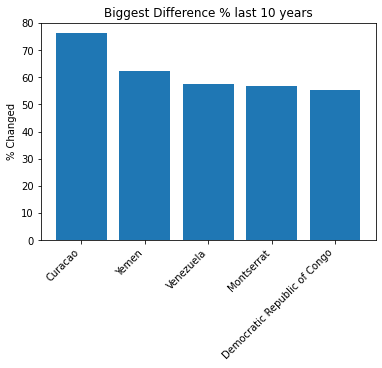

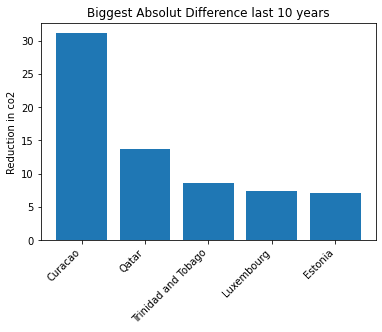

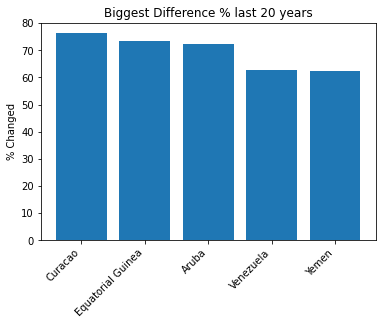

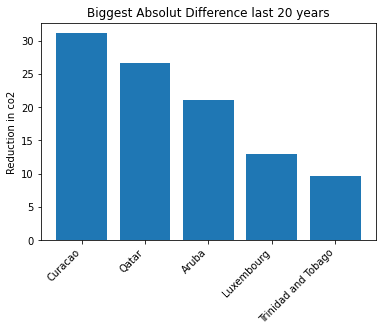

In [ ]:
# Plot the 4 different plots

def make_plot(data, column_name, kind, period):
  x_axis = data["Entity"]
  y_axis = np.absolute(data[column_name])
  plt.bar(x_axis, y_axis)
  plt.ylabel(kind)
  plt.title(column_name +" "+ period)
  plt.xticks(rotation=45, ha="right")
  plt.show()

make_plot(top_last_10_percentage, "Biggest Difference %", "% Changed", "last 10 years")
make_plot(top_last_10_absolute, "Biggest Absolut Difference", "Reduction in co2", "last 10 years")
make_plot(top_last_20_percentage, "Biggest Difference %", "% Changed", "last 20 years")
make_plot(top_last_20_absolute, "Biggest Absolut Difference", "Reduction in co2", "last 20 years")


In [ ]:
# Make a specific plot for one country
def select_country(df, country):
  select = df['Entity'] == country
  country_df = df[select]  
  fig = plt.figure()
  ax = fig.add_axes([1,1,1,1])
  x = country_df["Year"]
  y = country_df["co2 per capita"]
  ax.bar(x,y, width = 150)
  fig.set_size_inches(20,10)

  plt.title(country)
  plt.xlabel('Year')
  plt.ylabel('co2 per capita')
  plt.show()

select_country(combined_10_years, "Curacao")
select_country(combined_20_years, "Curacao")
